In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sy

from scipy.optimize import curve_fit

import pandas as pd  # data parsing library
from matplotlib import cm, colors

from glob import glob


In [20]:
filename = './data/Run01.txt'
#filename = './data/Run04.txt'
#filename = './data/Run09.txt'

FD = '2001-4-12'
#FD = '2001-11-6'
#FD = '2005-9-11'

df = pd.read_csv(filename,delim_whitespace=True, header=0 )

df['time'] = pd.to_datetime(df['date'] + ' ' + df['time'])

#df = df.set_index('time')
#df = df.sort_index()



[ 0.02944822  0.00160891]


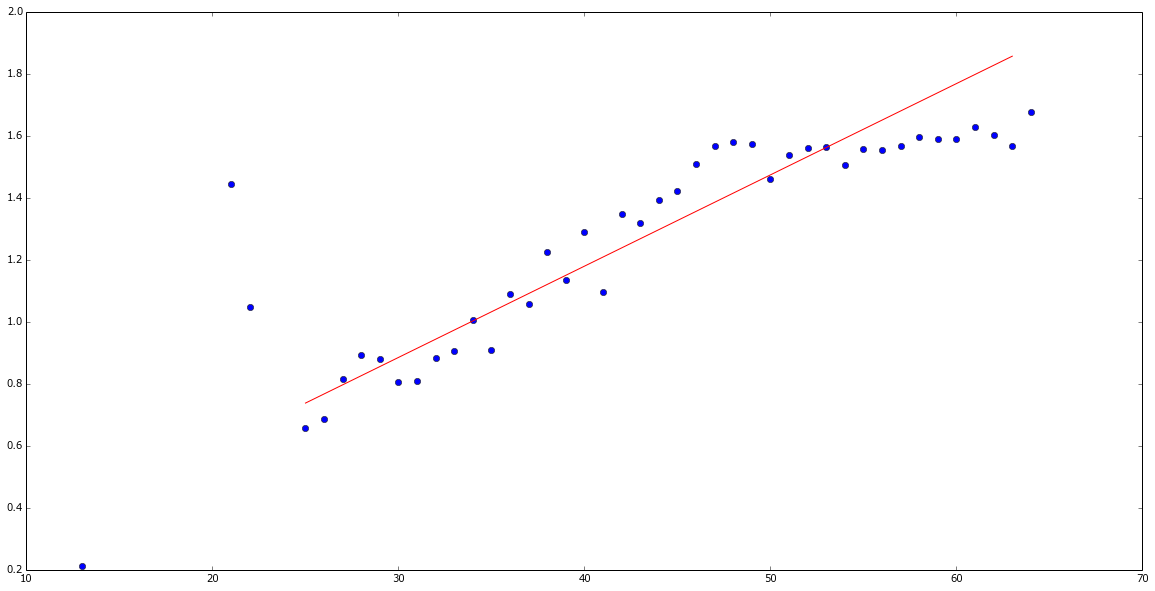

In [23]:
# find latitude relation

plt.figure(figsize=(20, 10))

lat_rad = np.zeros(90)
lat_num = np.zeros(90)


# sum radiation for one degree
for i in range(len(df)):
    if (df['DSi'][i]) > 0:
        lat_rad[int(round(df['lat'][i]))] += df['DSi'][i]
        lat_num[int(round(df['lat'][i]))] += 1
            
# average calculation
for i in range(90):
    lat_rad[i] /= lat_num[i]
            
plt.plot(lat_rad,'o')
    
pf_coef = np.polyfit(range(25,60),lat_rad[range(25,60)],1)

print pf_coef

p = (np.poly1d(pf_coef))

plt.plot(sy.linspace(25,63), p(sy.linspace(25,63)), 'r-')


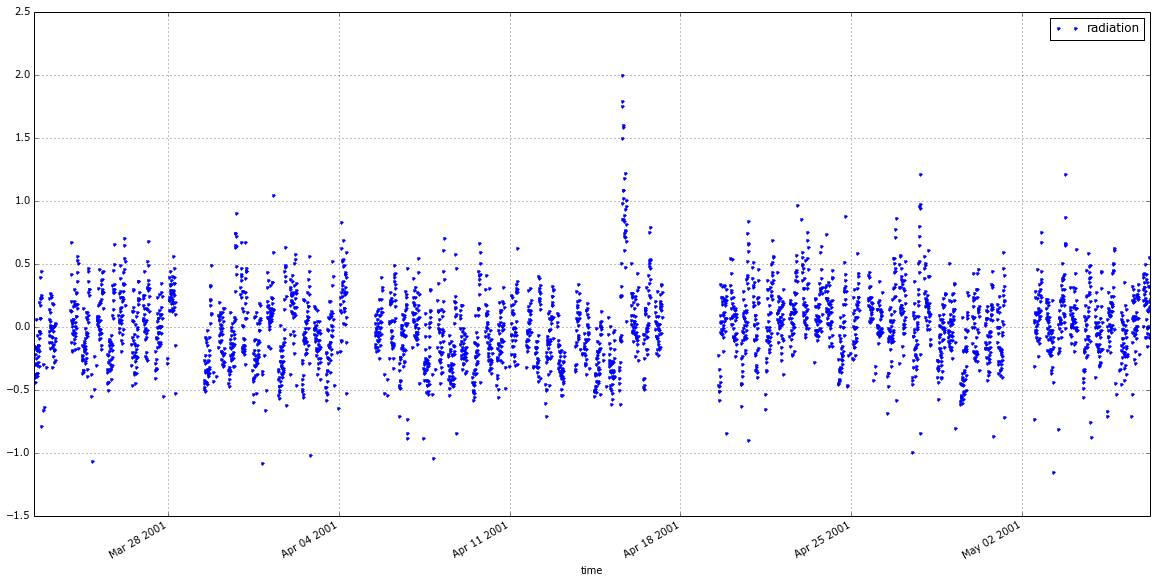

In [24]:
# subtract latitude ralation

df2 = pd.DataFrame(columns=['time', 'radiation'])


# read file
#df = pd.read_csv(filename,sep=',', header=0 )
records = len(df)  

for i in range(records): 
    #if (df['H'][i]) > 0:
    df2.loc[len(df2)+1] = [pd.to_datetime(df['time'][i]), df['DSi'][i] - p(df['lat'][i])]

df2 = df2.set_index('time')
#df2 = df2.sort_index()

    
#plt.figure(figsize=(20, 10))
#plt.plot(df2['time'],df2['radiation'])
#df2.plot(figsize=(20,10), style='o')
df2.plot(figsize=(20,10), style='.')
#plt.gcf().autofmt_xdate()
df2.to_csv('./radiation.csv') # save merged data to output directory

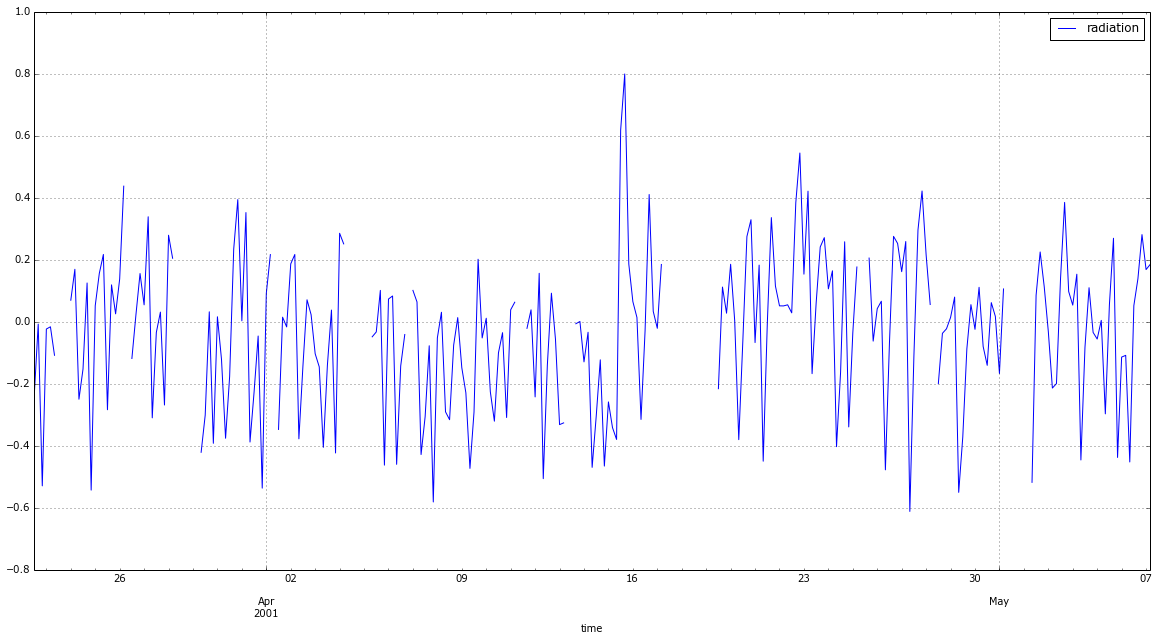

In [25]:
# resample measurements per days
df2 = pd.read_csv('./radiation.csv', sep=',', header=0, parse_dates='time' )
df2['time'] = pd.to_datetime(df2['time'])
df2 = df2.set_index('time')
df2['radiation'] = df2['radiation'].astype(float)
df2 = df2.resample('4h', how='mean', base=12)
#df2['2011-01-01': '2011-05-27'].plot(figsize=(20,10), tiprint df2
df2.plot(figsize=(20,10))
df2.to_csv('./radiation_avg_day.csv') 

df3 = pd.read_csv('./LSradiation.csv', sep=',', header=0, parse_dates='time')
df3['time'] = pd.to_datetime(df3['time'])
df3 = df3.set_index('time')
df3 = df3.sort_index()

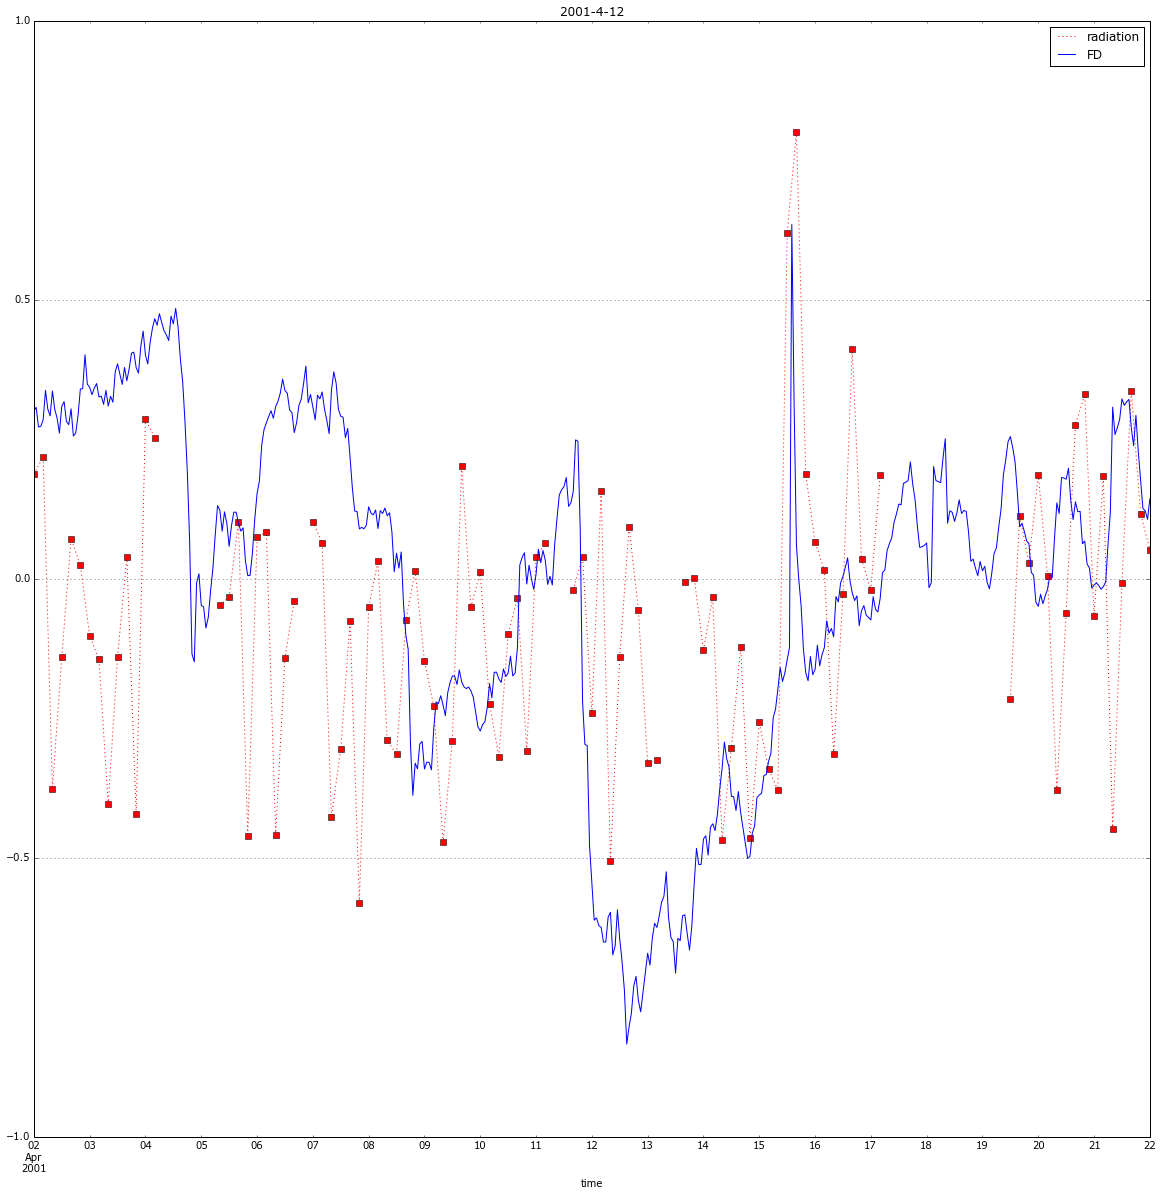

In [26]:
df3 = pd.read_csv('./LSradiation.csv', sep=',', header=0, parse_dates='time')
df3['time'] = pd.to_datetime(df3['time'])
df3 = df3.set_index('time')
df3 = df3.sort_index()

#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
#FD = '2001-12-17'

datetime.timedelta(days=1)
from_time = str(pd.to_datetime(FD) + datetime.timedelta(days=-10))
to_time = str(pd.to_datetime(FD) + datetime.timedelta(days=10))

df2[from_time: to_time].plot(figsize=(20,20),title=FD, color='red', marker='s',linestyle=':')
df3[from_time: to_time]['FD'] = df3[from_time: to_time]['FD'].sub(85)
df3[from_time: to_time]['FD'] = df3[from_time: to_time]['FD'].mul(0.1)
df3[from_time: to_time]['FD'].plot(figsize=(20, 20))

In [82]:
to_time

'2001-04-02 00:00:00'